##### Mithul bl.en.u4aie21034

In [1]:
pip install hmmlearn


  Obtaining dependency information for hmmlearn from https://files.pythonhosted.org/packages/6b/62/0c7b618eac6f27220baecdfe476259e005c690bf825d02a3cb8e5470bf2c/hmmlearn-0.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 660.6 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 656.4 kB/s eta 0:00:01
   ------------------- ------------------- 61.4/125.4 kB 656.4 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/125.4 kB 459.5 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 567.2 kB/s eta 0:00:00


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

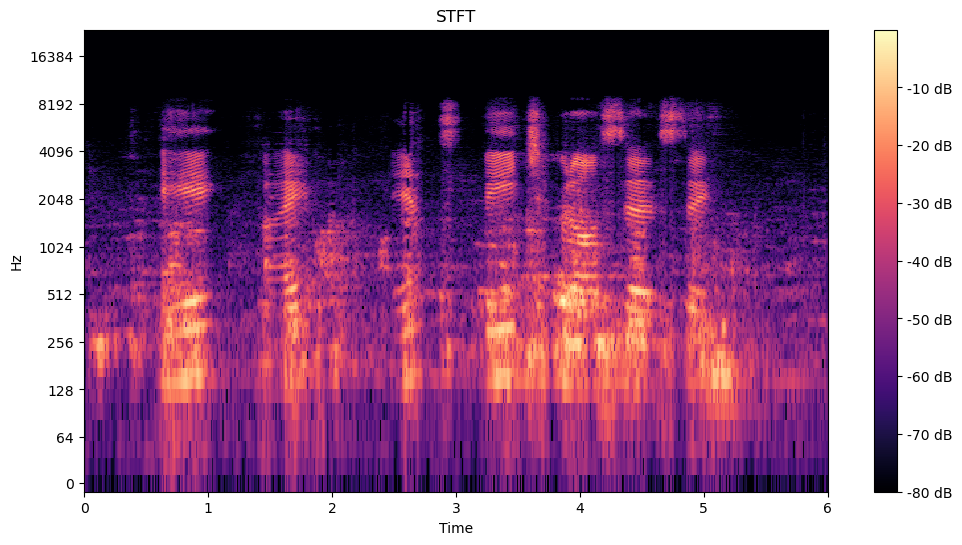

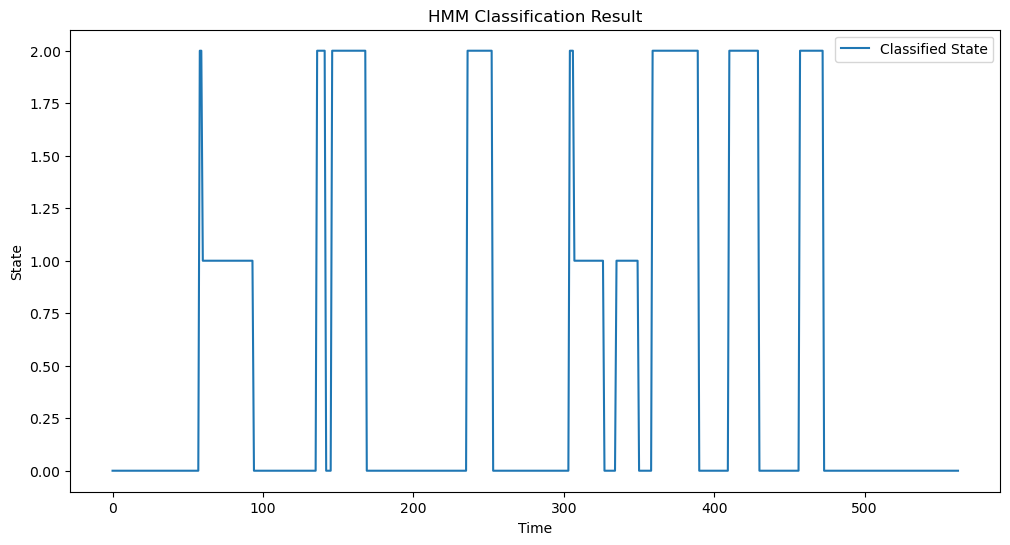

HMM Model Parameters:
Transition Matrix:
[[0.976      0.00266667 0.02133333]
 [0.04347826 0.95652174 0.        ]
 [0.05084746 0.01694915 0.93220339]]
Means:
[[1.22741516e-01 3.06431601e-01 5.72391998e-01 ... 3.26403388e-04
  3.21371288e-04 3.00866248e-04]
 [5.30095897e-01 1.09340056e+00 1.76373634e+00 ... 2.85336547e-04
  2.56561072e-04 2.18021893e-04]
 [3.31291231e-01 6.88241490e-01 1.02600038e+00 ... 3.05659530e-04
  2.90964581e-04 2.59926656e-04]]
Covariances:
[[[1.84024848e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 7.90083953e-02 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 3.06520271e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.66926351e-05
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   2.66976840e-05 0.00000000e+00]
  [0.00000000e+00 0.0

In [3]:
def load_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    return y, sr
def stft_features(y, sr):
    stft = np.abs(librosa.stft(y))
    return stft
def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model
def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()
def classify_signal(model, features):
    labels = model.predict(features.T)  
    return labels
def main():
    audio_file_path = "Recording.wav"
    y, sr = load_audio(audio_file_path)
    stft = stft_features(y, sr)
    plot_stft(stft, sr)    
    model = train_hmm(stft.T)  
    labels = classify_signal(model, stft)    
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
if __name__ == "__main__":
    main()